In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import planarity_criterion as pc 
import printers as printers
import numpy as np

planarity_crit = pc.PlanarityCriterion()
printer = printers.Printer()
tcc_printer = printers.ConnectedComponentsDrawer()

In [3]:
# 🎲 Generate a random seed  ### interesting seeds: 3244861328
seed = random.randint(0, 2**32 - 1)
print("Using seed:", seed)

# 🌱 Seed NumPy’s RNG
np.random.seed(seed)

Using seed: 312742980


Seed:  1966


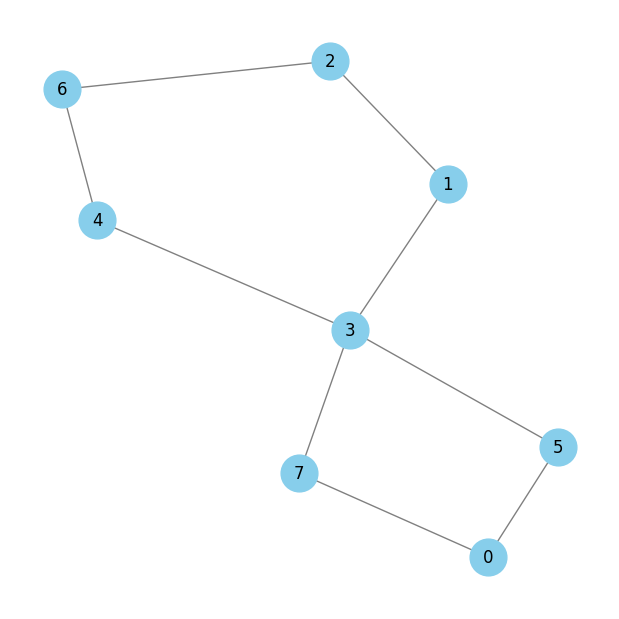

In [4]:
### CREATE A RANDOM GRAPH G ###


# Generate a random seed first
seed_value = 1966#random.randint(0, 10000)  # Random seed between 0 and 10000
random.seed(seed_value)
print("Seed: ", seed_value)

# Parameters
n = 8 # Number of nodes
p = 0.4 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)


# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

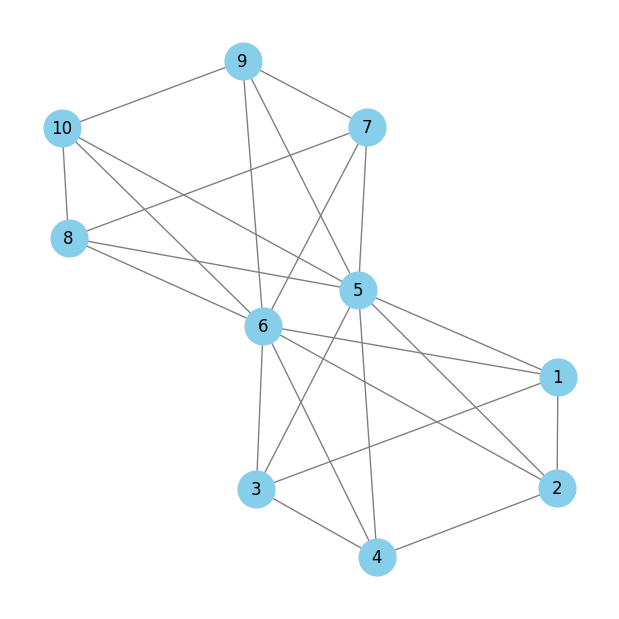

In [5]:
# TAKE GRAPH FROM EXAMPLES
import graph_examples as examples

graph_examples = examples.GraphExamples.get_examples()
G = graph_examples[13]

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [6]:
planar, info = planarity_crit.is_planar(G)
print("Correct result: ", nx.is_planar(G) == planar)

Correct result:  True


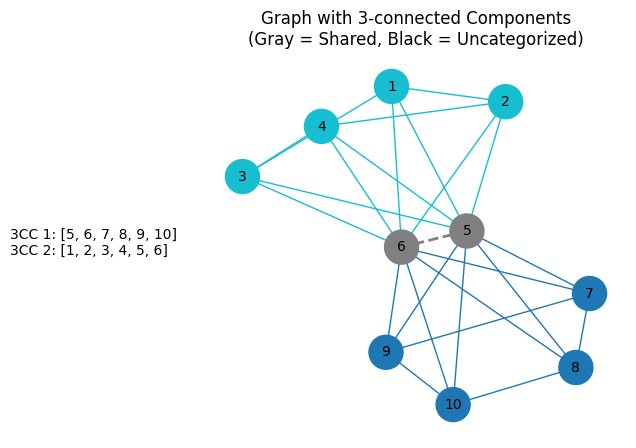

1


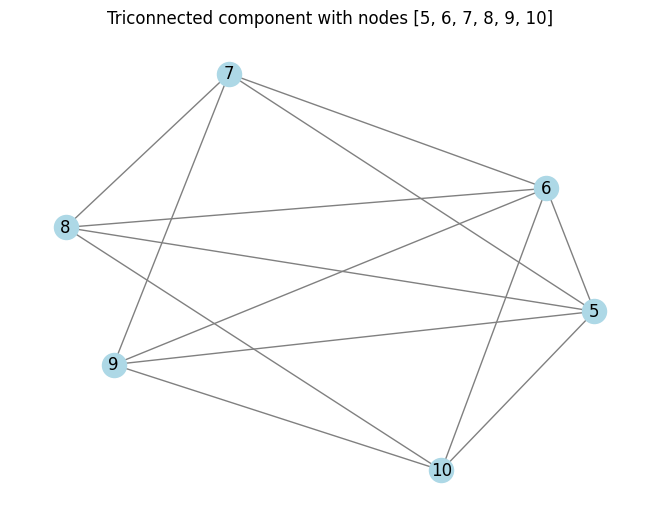

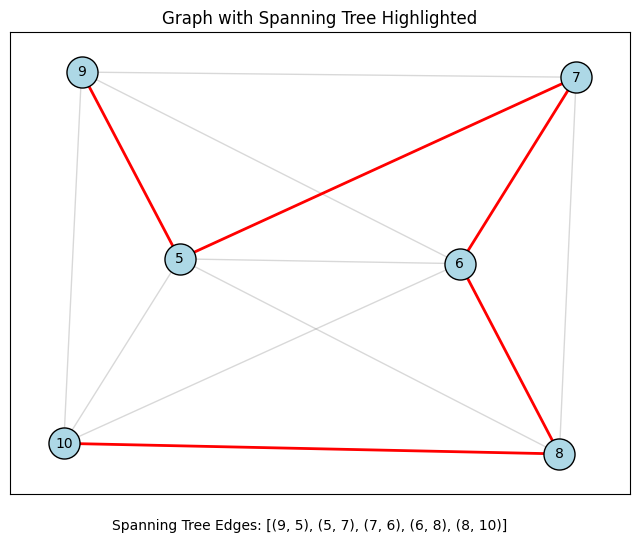

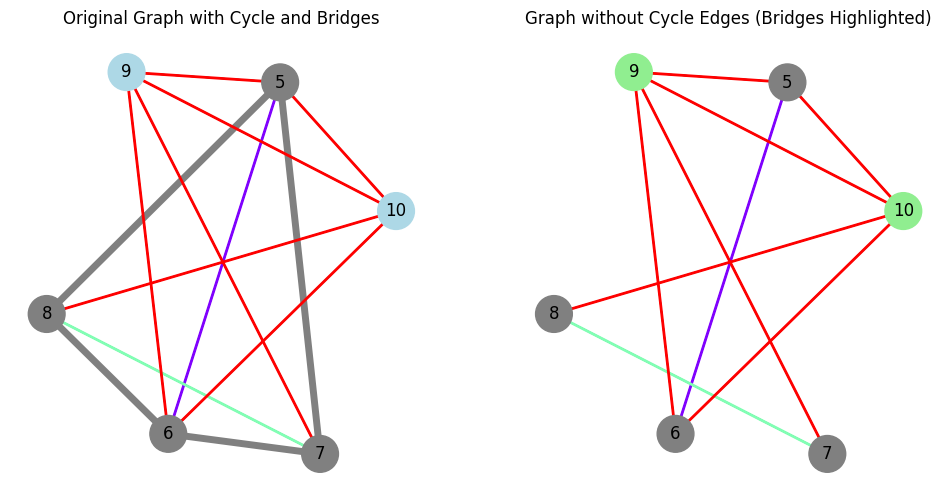

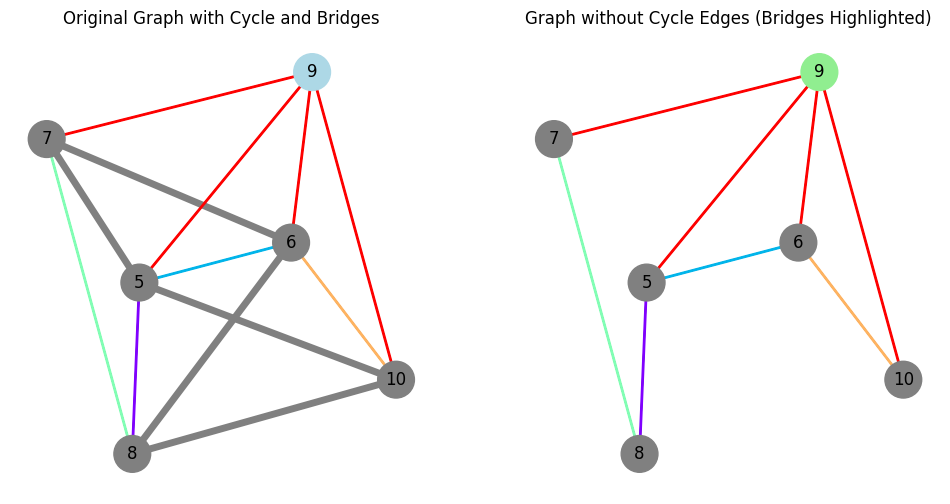

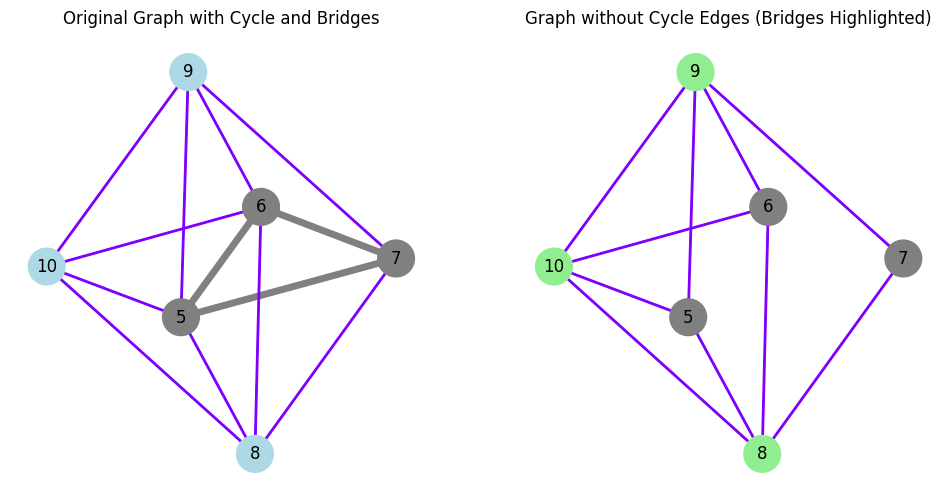

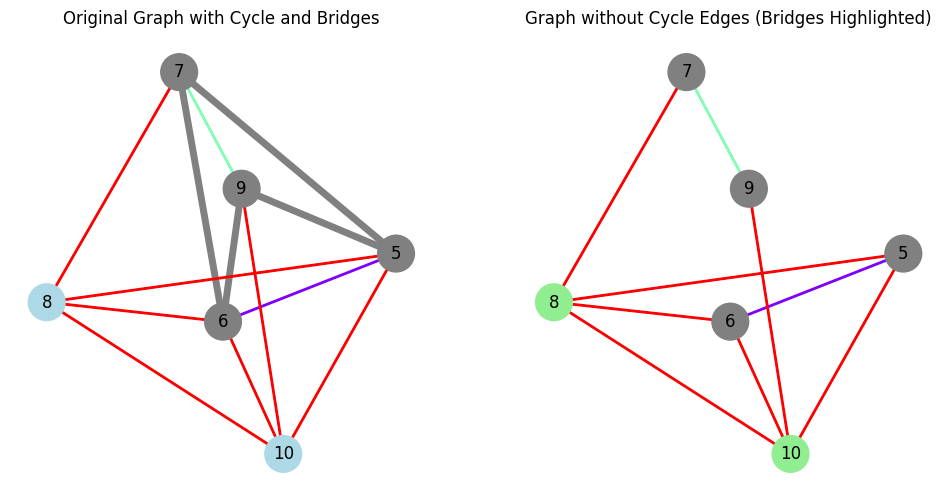

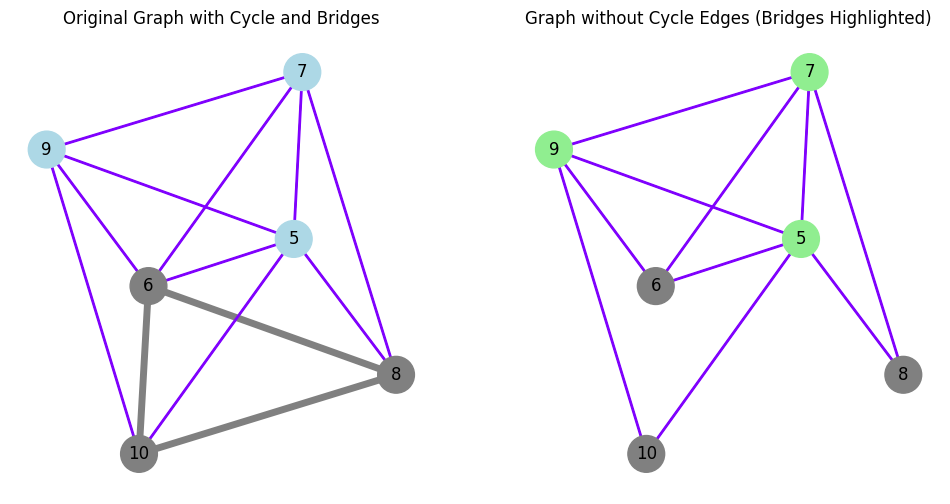

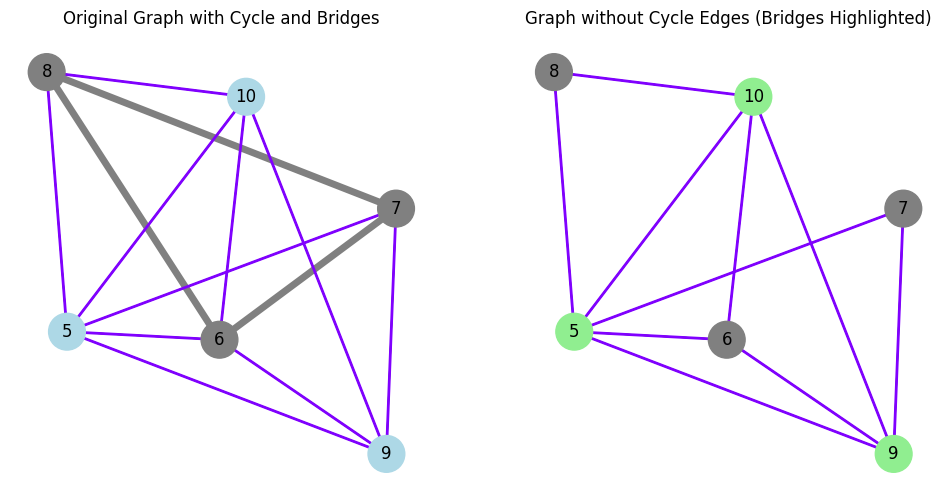

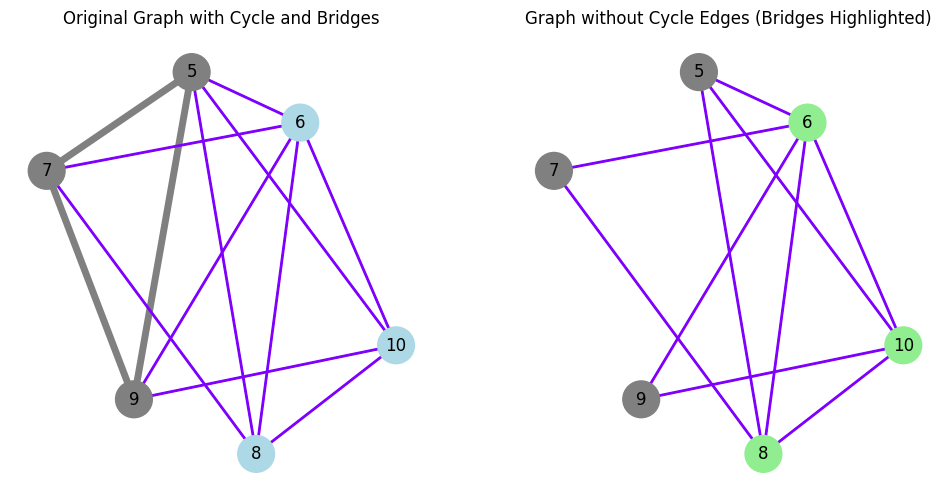

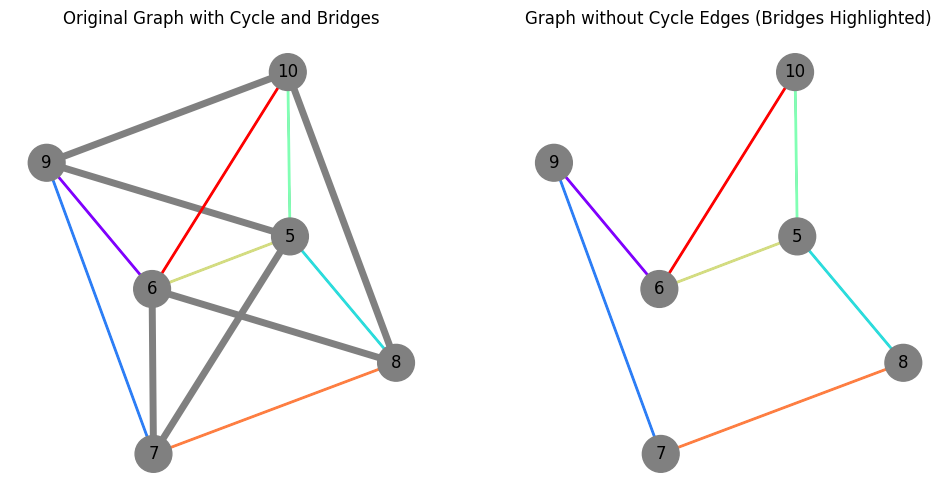


A1 matrix:
    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 0| 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

TypeError: object of type 'NoneType' has no len()

In [7]:
def get_graph_tcc(tcc_list, G):
    tcc = G.subgraph(tcc_list["node_list"]).copy()
    # Add virtual edges to each tcc
    tcc.add_edges_from(tcc_list["virtual_edges"])
    return tcc

def draw_graph(G, title="Graph"):
    pos = nx.spring_layout(G)  # or use nx.planar_layout(G) for planar graphs
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()


tcc_printer.print_n_connected_components(G, info["TCCs"], N=3, name="Triconnected components" )

for i, tcc_list in enumerate(info["TCCs"]):
    tcc = get_graph_tcc(tcc_list, G)
    print(len(info["planarity_info"]))
    tcc_info = info["planarity_info"][i]
    draw_graph(tcc, title="Triconnected component with nodes " + str(tcc.nodes()) )
    printer.print_spanning_tree(tcc, tcc_info["spanning_tree"])
    printer.print_bridges(tcc, tcc_info["bridges"])
    printers.Printer.print_B_matrix(tcc_info["A1"], "A1 matrix")
    printers.Printer.print_B_matrix(tcc_info["B1"], "B1 matrix") ### TODO CHECKEAR ESTOS
    printers.Printer.print_cycle_edge_table(tcc_info["truth_assign"], tcc_info["edge_index_map"], tcc_info["cycle_index_map"])
    print("\n" + "="*150)
    print(" " * 50 + ">>> END TRICONNECTED COMPONENT <<<")
    print("="*150 + "\n")
    print()
    print()

In [ ]:
# print(info)

In [ ]:
# print(info["planarity_info"])